# 만족도 예측하기 분류

In [1]:
import pandas as pd
cdf = pd.read_csv("Invistico_Airline.csv")

#학습 시간 단축을 위해 5000건만 추출
cdf = cdf[:5000]
cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [2]:
pd.set_option('display.max_columns', None)
cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [3]:
#데이터 전처리하기

In [4]:
#1. 레이블 불균형 확인
cdf.satisfaction.value_counts()

satisfied       2869
dissatisfied    2131
Name: satisfaction, dtype: int64

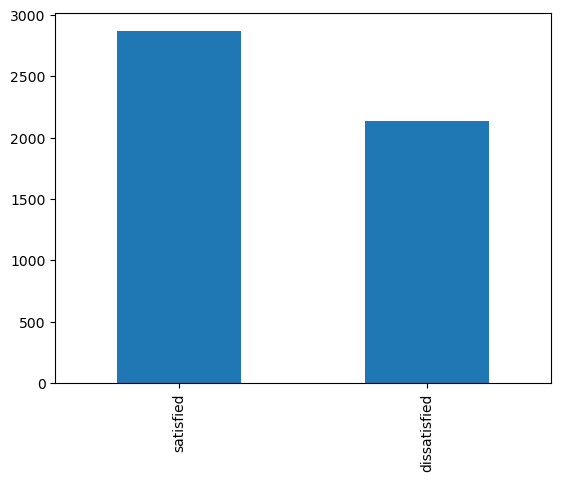

In [5]:
import matplotlib.pyplot as plt
cdf['satisfaction'].value_counts().plot(kind='bar')
plt.show()

In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       5000 non-null   object 
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   int64  
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

In [7]:
#결측치 행 삭제하기
cdf.dropna(axis=0, inplace=True)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       4973 non-null   object 
 1   Gender                             4973 non-null   object 
 2   Customer Type                      4973 non-null   object 
 3   Age                                4973 non-null   int64  
 4   Type of Travel                     4973 non-null   object 
 5   Class                              4973 non-null   object 
 6   Flight Distance                    4973 non-null   int64  
 7   Seat comfort                       4973 non-null   int64  
 8   Departure/Arrival time convenient  4973 non-null   int64  
 9   Food and drink                     4973 non-null   int64  
 10  Gate location                      4973 non-null   int64  
 11  Inflight wifi service              4973 non-null   int64

In [8]:
#레이블 데이터 y를 나누기
#cdf 데이터프레임에서 label만 y로 추출하기
y=cdf.satisfaction
y.head(5)

0    satisfied
1    satisfied
2    satisfied
3    satisfied
4    satisfied
Name: satisfaction, dtype: object

In [9]:
#price 칼럼 삭제하고 입력데이터 만들기
x = cdf.drop("satisfaction", axis=1)
#타깃 변수 데이터 만들기
y = cdf.satisfaction
x.shape, y.shape

((4973, 22), (4973,))

In [10]:
#info 메소드로 데이터 유형 확인하기
x.info()
x.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4973 non-null   object 
 1   Customer Type                      4973 non-null   object 
 2   Age                                4973 non-null   int64  
 3   Type of Travel                     4973 non-null   object 
 4   Class                              4973 non-null   object 
 5   Flight Distance                    4973 non-null   int64  
 6   Seat comfort                       4973 non-null   int64  
 7   Departure/Arrival time convenient  4973 non-null   int64  
 8   Food and drink                     4973 non-null   int64  
 9   Gate location                      4973 non-null   int64  
 10  Inflight wifi service              4973 non-null   int64  
 11  Inflight entertainment             4973 non-null   int64

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [11]:
#get_dummies 함수를 활용해 object 유형의 칼럼을 원핫 인코딩하기
x_gd = pd.get_dummies(x,
                      columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'],
                      drop_first=False)
x_gd.info()
x_gd.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4973 non-null   int64  
 1   Flight Distance                    4973 non-null   int64  
 2   Seat comfort                       4973 non-null   int64  
 3   Departure/Arrival time convenient  4973 non-null   int64  
 4   Food and drink                     4973 non-null   int64  
 5   Gate location                      4973 non-null   int64  
 6   Inflight wifi service              4973 non-null   int64  
 7   Inflight entertainment             4973 non-null   int64  
 8   Online support                     4973 non-null   int64  
 9   Ease of Online booking             4973 non-null   int64  
 10  On-board service                   4973 non-null   int64  
 11  Leg room service                   4973 non-null   int64

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,1,0,1,0


In [12]:
#레이블 인코딩하기

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#train_test_split 추출하기
x_train, x_test, y_train, y_test = train_test_split(x_gd, y, stratify=y, test_size=0.2, random_state=2023)

#레이블 인코더 생성하기
le = LabelEncoder()

#fit을 통해 y_train의 값마다 0과 1을 부여하는 규칙 생성하기
le.fit(y_train)

#y_train을 레이블 인코딩하기
le_y_train = le.transform(y_train)

#y_test를 레이블 인코딩하기
le_y_test = le.transform(y_test)

#인코딩이 수행된 데이터 확인하기
print('레이블 인코딩 후 데이터 : ', le_y_train)

#레이블별로 어떤 값이 부여되어 있는지 규칙 확인
print('레이블 인코딩 클래스 확인 : ', le.classes_)

#레이블 인코딩된 데이터를 디코딩했을 때 데이터 확인
print('레이블 인코딩을 디코딩했을 때 :', le.inverse_transform(le_y_train))

레이블 인코딩 후 데이터 :  [1 1 1 ... 0 1 1]
레이블 인코딩 클래스 확인 :  ['dissatisfied' 'satisfied']
레이블 인코딩을 디코딩했을 때 : ['satisfied' 'satisfied' 'satisfied' ... 'dissatisfied' 'satisfied'
 'satisfied']


In [14]:
#모델 학습하기

In [15]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

lr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgbc = XGBRFClassifier(random_state=1)
etc = ExtraTreesClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)

#모델 학습 수행하기
lr.fit(x_train, le_y_train)
dtc.fit(x_train, le_y_train)
rfc.fit(x_train, le_y_train)
gbc.fit(x_train, le_y_train)
xgbc.fit(x_train, le_y_train)
etc.fit(x_train, le_y_train)
lgbmc.fit(x_train, le_y_train)

#순서대로 적용할 모델을 리스트에 저장하기
models=[lr, dtc, rfc, gbc, xgbc, etc, lgbmc]

#for 문을 활용해 학습 모델별 score를 리스트에 저장하기
acc_train_list = []
acc_test_list=[]
for model in models:
    acc_train_list.append(round(model.score(x_train, le_y_train), 5))
    acc_test_list.append(round(model.score(x_test, le_y_test), 5))

#모델별 정확도를 출력하기
for i in range(len(models)):
    print('학습모델: ',models[i])
    print('train 정확도: ',acc_train_list[i])
    print('test 정확도: ',acc_test_list[i])
    print('--------------------------------')

C:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2284, number of negative: 1694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 3978, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.574158 -> initscore=0.298836
[LightGBM] [Info] Start training from score 0.298836
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [16]:
#최적 하이퍼파라미터 찾기
#1. 그리드 서치하기

In [18]:
%%time

from sklearn.model_selection import GridSearchCV

#param_grid를 정의하여 각 파라미터별로 교차해서 모든 학습을 수행하기
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, 50, None],
}

#estimator = rfc : 가장 우수한 모델이었던 rfc 활용
#param_grid=param_grid : 미리 정의한 파라미터들을 교차 적용
#n_jobs =-1 : -1로 지정하면 모든 cpu 활용
cv_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

#학습 수행하기
cv_rfc.fit(x_train, le_y_train)
#best_score 출력하기
print('최적의 파마리터 학습 시 Score :', round(cv_rfc.best_score_, 5))
#best_params 출력하기
print('최적의 파라미터 :', cv_rfc.best_params_)

최적의 파마리터 학습 시 Score : 0.9995
최적의 파라미터 : {'max_depth': 10, 'max_features': None, 'n_estimators': 50}
CPU times: total: 10.4 s
Wall time: 1min 17s


In [19]:
#최적의 하이퍼파라미터로 도출된 값을 모델에 입력하기
rfc = RandomForestClassifier(
    n_estimators = 50,
    max_features = None,
    n_jobs=-1,
    max_depth = 10)

#rfc 학습 수행하기
rfc.fit(x_train, le_y_train)

#이전에 하이퍼파라미터 설정 없이 수행했을 때의 정확도 확인하기
print('기존 모델의 Test 정확도: 1.0')

#최적의 하이퍼파라미터 입력 후 학습시킨 모델의 정확도 확인하기
print('최적의 하이퍼파라미터 반영한 모델의 Test 정확도: ',round(rfc.score(x_test, le_y_test), 5))

#향상된 정확도 gap 계산하기
print('정확도 향상: ',round(rfc.score(x_test, le_y_test)-1.0, 5))

기존 모델의 Test 정확도: 1.0
최적의 하이퍼파라미터 반영한 모델의 Test 정확도:  1.0
정확도 향상:  0.0


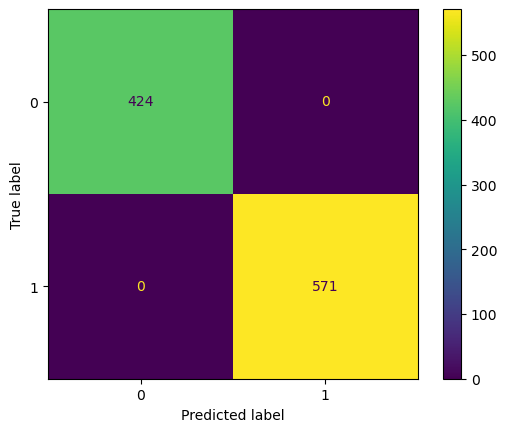

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       571

    accuracy                           1.00       995
   macro avg       1.00      1.00      1.00       995
weighted avg       1.00      1.00      1.00       995



In [20]:
#오차 행렬로 모델 평가하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#rfc 모델로 x_test를 예측한 값을 y_pred로 저장하기
y_pred = rfc.predict(x_test)

#실제값 le_y_test(레이블 인코딩을 해야 1,0으로 표현됨)와 예측값 y_pred 비교하기
cm = confusion_matrix(le_y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

#오차 행렬(confusion matrix) 출력하기
plt.show()

#오차 행렬을 통한 각종 지표들을 리포트로 출력하기
print(classification_report(le_y_test, y_pred))